In [6]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# for nifty dataset from 2020-2024

In [1]:
from tensorflow.keras.layers import LSTM,GRU,Conv1D,MaxPooling1D,Dense
from tensorflow.keras import Sequential

In [8]:
import matplotlib.pyplot as plt

# LSTM

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Preprocess data
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

# Feature engineering
def feature_engineering(data):
    # Add rolling average as a new feature
    data['Rolling_Avg'] = data['Close'].rolling(window=5).mean()
    return data

# Create dataset
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), :])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Set parameters
file_path = 'nifty_data_2022_2024.csv'  # File path to the CSV file
look_back = 20
epochs = 100
batch_size = 32

# Read data from CSV file
stock_data = pd.read_csv(file_path)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data.set_index('Date')

# Feature engineering
stock_data = feature_engineering(stock_data)

# Drop rows with NaN values due to rolling average
stock_data.dropna(inplace=True)

# Preprocess data
scaled_data, scaler = preprocess_data(stock_data[['Close', 'Rolling_Avg']].values)

# Create dataset
X, Y = create_dataset(scaled_data, look_back)

# Reshape data for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2]))

# Split data into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Define the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test), verbose=2, callbacks=[early_stopping])

# Evaluate the model
train_loss = model.evaluate(X_train, Y_train, verbose=0)
test_loss = model.evaluate(X_test, Y_test, verbose=0)
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")

# Predict on test set
Y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f"Root Mean Square Error (RMSE): {rmse}")

# Calculate MAPE
mape = mean_absolute_percentage_error(Y_test, Y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
32/32 - 10s - 310ms/step - loss: 0.0166 - val_loss: 0.0039
Epoch 2/100
32/32 - 2s - 55ms/step - loss: 0.0033 - val_loss: 8.9816e-04
Epoch 3/100
32/32 - 1s - 34ms/step - loss: 0.0027 - val_loss: 0.0018
Epoch 4/100
32/32 - 1s - 33ms/step - loss: 0.0025 - val_loss: 6.7746e-04
Epoch 5/100
32/32 - 1s - 36ms/step - loss: 0.0024 - val_loss: 6.2971e-04
Epoch 6/100
32/32 - 1s - 36ms/step - loss: 0.0023 - val_loss: 0.0037
Epoch 7/100
32/32 - 1s - 33ms/step - loss: 0.0020 - val_loss: 9.7991e-04
Epoch 8/100
32/32 - 1s - 36ms/step - loss: 0.0022 - val_loss: 5.0333e-04
Epoch 9/100
32/32 - 1s - 34ms/step - loss: 0.0022 - val_loss: 5.6259e-04
Epoch 10/100
32/32 - 1s - 36ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 11/100
32/32 - 1s - 35ms/step - loss: 0.0019 - val_loss: 0.0025
Epoch 12/100
32/32 - 1s - 37ms/step - loss: 0.0021 - val_loss: 8.9767e-04
Epoch 13/100
32/32 - 1s - 38ms/step - loss: 0.0019 - val_loss: 4.4936e-04
Epoch 14/100
32/32 - 1s - 18ms/step - loss: 0.0017 - val_loss: 0.

In [4]:
X_train.shape

(1013, 20, 2)

In [13]:
# Predicting future values
num_predictions = 100
predictions = []

current_sequence = X_test[-1]
# Predict future values
for i in range(num_predictions):
    # Reshape current_sequence to match the model input shape
    current_sequence_reshaped = current_sequence.reshape(1, look_back, 2)
    
    # Predict the next value
    next_prediction = model.predict(current_sequence_reshaped)
    
    # Append the prediction to the list of predictions
    predictions.append(next_prediction[0])
    
    # Update the input sequence: shift by one element and add the prediction
    current_sequence = np.roll(current_sequence, -1, axis=0)
    current_sequence[-1] = next_prediction

# Pad the predictions array with zeros to match the expected shape (100, 2)
predictions_padded = np.hstack((np.array(predictions).reshape(-1, 1), np.zeros((num_predictions, 1))))

# Transform predictions back to the original scale using scaler
inverse_transformed_predictions = scaler.inverse_transform(predictions_padded)

# Extract only the first column as it contains the actual predictions
predictions = inverse_transformed_predictions[:, 0]

print("Future predictions for the next 100 days:")
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━

In [14]:
pred=model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


# PLOT

Text(0, 0.5, 'Value')

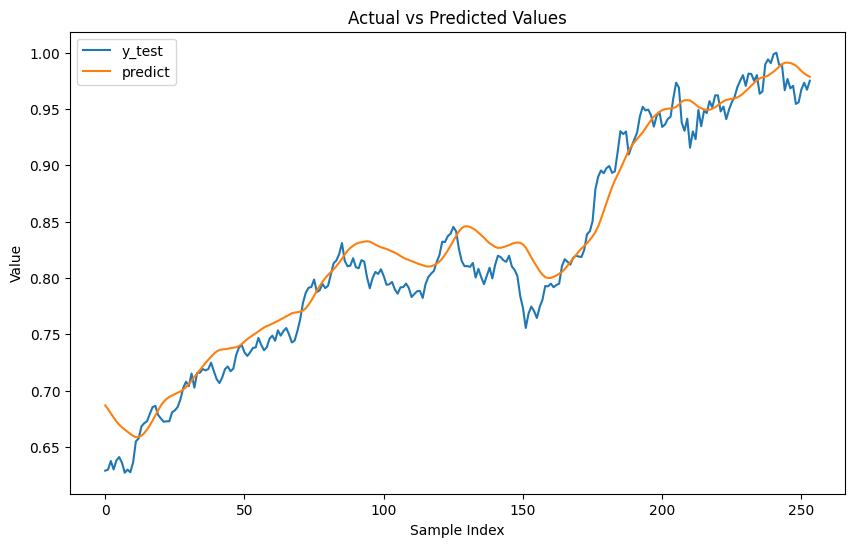

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(Y_test,label="y_test")
plt.plot(pred,label="predict")
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')


# GRU

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Preprocess data
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler
# Create dataset
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Set parameters
file_path = 'nifty_data_2022_2024.csv'  # File path to the CSV file
look_back = 20
epochs = 100
batch_size = 32

# Read data from CSV file
stock_data = pd.read_csv(file_path)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data.set_index('Date')

# Preprocess data
scaled_data, scaler = preprocess_data(stock_data[['Close']].values)

# Create dataset
X, Y = create_dataset(scaled_data, look_back)

# Reshape data for GRU
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Define the GRU model with dropout
model = Sequential([
    GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),  # Add dropout for regularization
    GRU(units=50),
    Dropout(0.2),  # Add dropout for regularization
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test), verbose=2, callbacks=[early_stopping])

# Evaluate the model
train_loss = model.evaluate(X_train, Y_train, verbose=0)
test_loss = model.evaluate(X_test, Y_test, verbose=0)
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")

# Predict on test set
Y_pred = model.predict(X_test)

# Flatten Y_pred if necessary to match the shape of Y_test
if Y_pred.shape != Y_test.shape:
    Y_pred = Y_pred.flatten()

# Calculate RMSE for the test set
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f"Root Mean Square Error (RMSE): {rmse}")

# Calculate MAPE for the test set
mape = mean_absolute_percentage_error(Y_test, Y_pred) 
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
32/32 - 13s - 414ms/step - loss: 0.0478 - val_loss: 0.0352
Epoch 2/100
32/32 - 4s - 110ms/step - loss: 0.0052 - val_loss: 0.0025
Epoch 3/100
32/32 - 1s - 43ms/step - loss: 0.0032 - val_loss: 3.2118e-04
Epoch 4/100
32/32 - 1s - 43ms/step - loss: 0.0025 - val_loss: 9.2693e-04
Epoch 5/100
32/32 - 1s - 45ms/step - loss: 0.0025 - val_loss: 3.7268e-04
Epoch 6/100
32/32 - 1s - 43ms/step - loss: 0.0022 - val_loss: 2.4911e-04
Epoch 7/100
32/32 - 1s - 33ms/step - loss: 0.0021 - val_loss: 7.8852e-04
Epoch 8/100
32/32 - 1s - 35ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 9/100
32/32 - 1s - 43ms/step - loss: 0.0022 - val_loss: 1.9124e-04
Epoch 10/100
32/32 - 1s - 44ms/step - loss: 0.0020 - val_loss: 2.9236e-04
Epoch 11/100
32/32 - 1s - 37ms/step - loss: 0.0020 - val_loss: 8.7541e-04
Epoch 12/100
32/32 - 1s - 37ms/step - loss: 0.0020 - val_loss: 4.4585e-04
Epoch 13/100
32/32 - 2s - 59ms/step - loss: 0.0018 - val_loss: 2.0395e-04
Epoch 14/100
32/32 - 2s - 50ms/step - loss: 0.0018 - val

In [6]:
import numpy as np

# Number of future predictions
num_predictions = 100

# Initialize the list for storing predictions
predictions = []

# Retrieve the last input sequence from the test data
current_sequence = X_test[-1]

# Predict future values using the GRU model
for i in range(num_predictions):
    # Reshape the current sequence to match the input shape expected by the GRU model
    current_sequence_reshaped = current_sequence.reshape(1, look_back, 1)
    
    # Predict the next value using the GRU model
    next_prediction = model.predict(current_sequence_reshaped)
    
    # Append the predicted value to the predictions list
    predictions.append(next_prediction[0, 0])  # Store only the first value from the prediction
    
    # Shift the current sequence left by one element and insert the new prediction at the end
    current_sequence = np.roll(current_sequence, -1, axis=0)
    current_sequence[-1] = next_prediction[0, 0]  # Update with only the first predicted value

# Convert predictions list to numpy array
predictions = np.array(predictions)

# Reshape predictions array to match the expected shape for inverse transformation
predictions_reshaped = predictions.reshape(-1, 1)

# Transform predictions back to the original scale using the scaler
inverse_transformed_predictions = scaler.inverse_transform(predictions_reshaped)

# Output the predictions
print("Future predictions for the next 100 days:")
print(inverse_transformed_predictions.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━

# PLOT

Text(0, 0.5, 'Value')

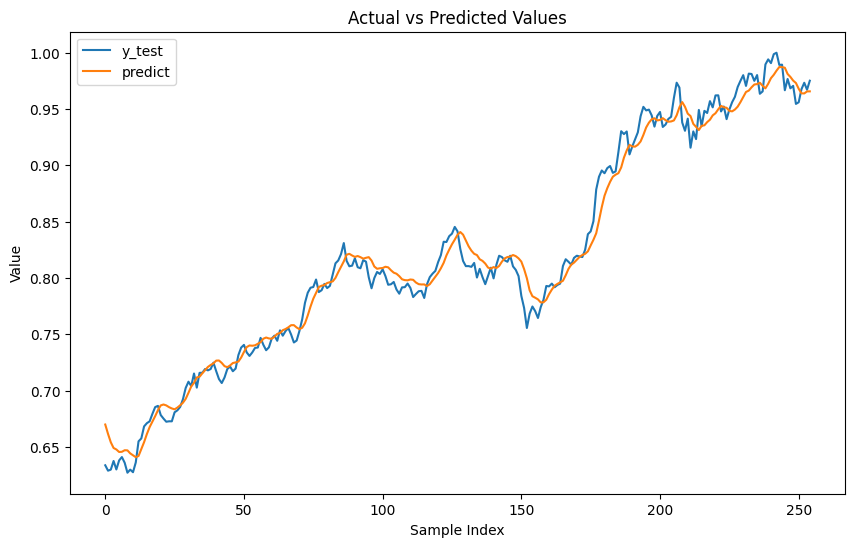

In [10]:

plt.figure(figsize=(10, 6))
plt.plot(Y_test,label="y_test")
plt.plot(Y_pred,label="predict")
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')


# CNN1D

In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Preprocess data
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

# Create dataset
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Set parameters
file_path = 'nifty_data_2022_2024.csv'  # File path to the CSV file
look_back = 20
epochs = 100
batch_size = 32

# Read data from CSV file
stock_data = pd.read_csv(file_path)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data.set_index('Date')

# Preprocess data
scaled_data, scaler = preprocess_data(stock_data[['Close']].values)

# Create dataset
X, Y = create_dataset(scaled_data, look_back)

# Reshape data for CNN
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split data into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Define the CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test), verbose=2)

# Evaluate the model
train_loss = model.evaluate(X_train, Y_train, verbose=0)
test_loss = model.evaluate(X_test, Y_test, verbose=0)
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
32/32 - 3s - 84ms/step - loss: 0.0570 - val_loss: 0.0018
Epoch 2/100
32/32 - 0s - 10ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 3/100
32/32 - 0s - 10ms/step - loss: 0.0010 - val_loss: 8.6175e-04
Epoch 4/100
32/32 - 0s - 12ms/step - loss: 0.0010 - val_loss: 8.6504e-04
Epoch 5/100
32/32 - 0s - 10ms/step - loss: 9.5994e-04 - val_loss: 9.0583e-04
Epoch 6/100
32/32 - 0s - 12ms/step - loss: 9.4057e-04 - val_loss: 0.0011
Epoch 7/100
32/32 - 0s - 10ms/step - loss: 8.5432e-04 - val_loss: 0.0012
Epoch 8/100
32/32 - 0s - 9ms/step - loss: 8.1170e-04 - val_loss: 0.0010
Epoch 9/100
32/32 - 0s - 10ms/step - loss: 7.3165e-04 - val_loss: 9.7167e-04
Epoch 10/100
32/32 - 0s - 9ms/step - loss: 6.8964e-04 - val_loss: 0.0012
Epoch 11/100
32/32 - 0s - 10ms/step - loss: 6.4629e-04 - val_loss: 0.0010
Epoch 12/100
32/32 - 0s - 10ms/step - loss: 6.1486e-04 - val_loss: 0.0010
Epoch 13/100
32/32 - 0s - 11ms/step - loss: 5.7786e-04 - val_loss: 0.0010
Epoch 14/100
32/32 - 0s - 10ms/step - loss: 5.628

In [17]:
import numpy as np

# Number of future predictions
num_predictions = 100

# Initialize the list for storing predictions
predictions = []

# Retrieve the last input sequence from the test data
current_sequence = X_test[-1]

# Predict future values using the GRU model
for i in range(num_predictions):
    # Reshape the current sequence to match the input shape expected by the GRU model
    current_sequence_reshaped = current_sequence.reshape(1, look_back, 1)
    
    # Predict the next value using the GRU model
    next_prediction = model.predict(current_sequence_reshaped)
    
    # Append the predicted value to the predictions list
    predictions.append(next_prediction[0, 0])  # Store only the first value from the prediction
    
    # Shift the current sequence left by one element and insert the new prediction at the end
    current_sequence = np.roll(current_sequence, -1, axis=0)
    current_sequence[-1] = next_prediction[0, 0]  # Update with only the first predicted value

# Convert predictions list to numpy array
predictions = np.array(predictions)

# Reshape predictions array to match the expected shape for inverse transformation
predictions_reshaped = predictions.reshape(-1, 1)

# Transform predictions back to the original scale using the scaler
inverse_transformed_predictions = scaler.inverse_transform(predictions_reshaped)

# Output the predictions
print("Future predictions for the next 100 days:")
print(inverse_transformed_predictions.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━

# **PLOT**


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
Root Mean Square Error (RMSE): 0.025042940022204783
Mean Absolute Percentage Error (MAPE): 0.02


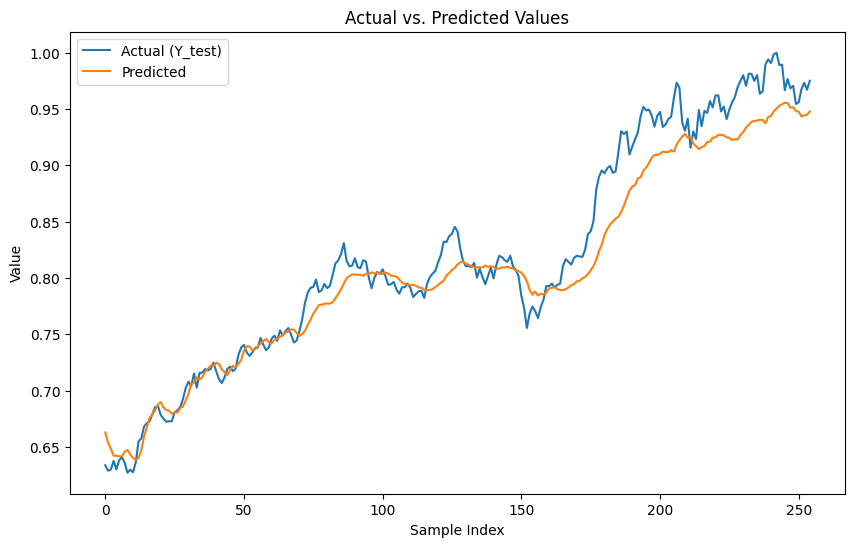

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Make predictions on the test data
pred = model.predict(X_test)

# Calculate Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(Y_test, pred))
print(f"Root Mean Square Error (RMSE): {rmse}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(Y_test, pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")

# Plotting the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(Y_test, label="Actual (Y_test)")
plt.plot(pred, label="Predicted")
plt.legend()
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.show()


# **RNN**



In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Preprocess data
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

# Create dataset
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Set parameters
file_path = 'nifty_data_2022_2024.csv'  # File path to the CSV file
look_back = 20
epochs = 100
batch_size = 32

# Read data from CSV file
stock_data = pd.read_csv(file_path)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data.set_index('Date')

# Preprocess data
scaled_data, scaler = preprocess_data(stock_data[['Close']].values)

# Create dataset
X, Y = create_dataset(scaled_data, look_back)

# Reshape data for SimpleRNN
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split data into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Define the SimpleRNN model
model = Sequential([
    SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    SimpleRNN(units=50),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test), verbose=2)

# Evaluate the model
train_loss = model.evaluate(X_train, Y_train, verbose=0)
test_loss = model.evaluate(X_test, Y_test, verbose=0)
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
32/32 - 10s - 316ms/step - loss: 0.0131 - val_loss: 0.0053
Epoch 2/100
32/32 - 1s - 24ms/step - loss: 8.4459e-04 - val_loss: 0.0032
Epoch 3/100
32/32 - 1s - 21ms/step - loss: 5.1062e-04 - val_loss: 0.0020
Epoch 4/100
32/32 - 1s - 22ms/step - loss: 3.8904e-04 - val_loss: 0.0015
Epoch 5/100
32/32 - 1s - 20ms/step - loss: 3.4018e-04 - val_loss: 0.0012
Epoch 6/100
32/32 - 1s - 20ms/step - loss: 3.8782e-04 - val_loss: 0.0016
Epoch 7/100
32/32 - 1s - 20ms/step - loss: 3.9807e-04 - val_loss: 9.6382e-04
Epoch 8/100
32/32 - 1s - 20ms/step - loss: 3.2397e-04 - val_loss: 0.0016
Epoch 9/100
32/32 - 1s - 19ms/step - loss: 3.4108e-04 - val_loss: 0.0016
Epoch 10/100
32/32 - 1s - 22ms/step - loss: 3.3643e-04 - val_loss: 0.0029
Epoch 11/100
32/32 - 1s - 21ms/step - loss: 4.0788e-04 - val_loss: 0.0013
Epoch 12/100
32/32 - 1s - 19ms/step - loss: 2.7947e-04 - val_loss: 7.8866e-04
Epoch 13/100
32/32 - 1s - 20ms/step - loss: 2.6992e-04 - val_loss: 0.0017
Epoch 14/100
32/32 - 1s - 21ms/step - los

In [22]:
import numpy as np

# Number of future predictions
num_predictions = 100

# Initialize the list for storing predictions
predictions = []

# Retrieve the last input sequence from the test data
current_sequence = X_test[-1]

# Predict future values using the GRU model
for i in range(num_predictions):
    # Reshape the current sequence to match the input shape expected by the GRU model
    current_sequence_reshaped = current_sequence.reshape(1, look_back, 1)
    
    # Predict the next value using the GRU model
    next_prediction = model.predict(current_sequence_reshaped)
    
    # Append the predicted value to the predictions list
    predictions.append(next_prediction[0, 0])  # Store only the first value from the prediction
    
    # Shift the current sequence left by one element and insert the new prediction at the end
    current_sequence = np.roll(current_sequence, -1, axis=0)
    current_sequence[-1] = next_prediction[0, 0]  # Update with only the first predicted value

# Convert predictions list to numpy array
predictions = np.array(predictions)

# Reshape predictions array to match the expected shape for inverse transformation
predictions_reshaped = predictions.reshape(-1, 1)

# Transform predictions back to the original scale using the scaler
inverse_transformed_predictions = scaler.inverse_transform(predictions_reshaped)

# Output the predictions
print("Future predictions for the next 100 days:")
print(inverse_transformed_predictions.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━

# PLOT

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step  
Root Mean Square Error (RMSE): 0.031518843388285415
Mean Absolute Percentage Error (MAPE): 0.034087620961245645


Text(0, 0.5, 'Value')

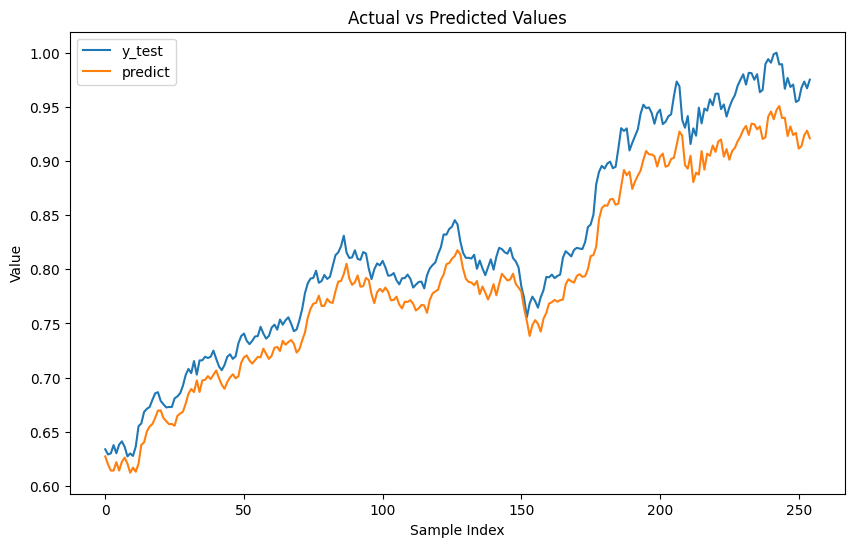

In [23]:
Y_pred=model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f"Root Mean Square Error (RMSE): {rmse}")

# Calculate MAPE for the test set
mape = mean_absolute_percentage_error(Y_test, Y_pred) 
print(f"Mean Absolute Percentage Error (MAPE): {mape:}")
plt.figure(figsize=(10, 6))
plt.plot(Y_test,label="y_test")
plt.plot(Y_pred,label="predict")
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')


# BI-LSTM

In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, LSTM

# Preprocess data
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

# Create dataset
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Set parameters
file_path = 'nifty_data_2022_2024.csv'  # File path to the CSV file
look_back = 20
epochs = 100
batch_size = 32

# Read data from CSV file
stock_data = pd.read_csv(file_path)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data.set_index('Date')

# Preprocess data
scaled_data, scaler = preprocess_data(stock_data[['Close']].values)

# Create dataset
X, Y = create_dataset(scaled_data, look_back)

# Reshape data for Bidirectional LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split data into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Define the Bidirectional LSTM model
model = Sequential([
    Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], 1)),
    Bidirectional(LSTM(units=50)),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test), verbose=2)

# Evaluate the model
train_loss = model.evaluate(X_train, Y_train, verbose=0)
test_loss = model.evaluate(X_test, Y_test, verbose=0)
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
32/32 - 19s - 589ms/step - loss: 0.0270 - val_loss: 6.8693e-04
Epoch 2/100
32/32 - 4s - 112ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 3/100
32/32 - 2s - 54ms/step - loss: 8.0034e-04 - val_loss: 6.1221e-04
Epoch 4/100
32/32 - 2s - 63ms/step - loss: 7.7529e-04 - val_loss: 5.8058e-04
Epoch 5/100
32/32 - 2s - 51ms/step - loss: 7.6236e-04 - val_loss: 5.3417e-04
Epoch 6/100
32/32 - 2s - 50ms/step - loss: 7.4964e-04 - val_loss: 8.1255e-04
Epoch 7/100
32/32 - 2s - 56ms/step - loss: 7.1771e-04 - val_loss: 5.8582e-04
Epoch 8/100
32/32 - 2s - 48ms/step - loss: 7.0071e-04 - val_loss: 0.0017
Epoch 9/100
32/32 - 2s - 52ms/step - loss: 6.7589e-04 - val_loss: 6.5267e-04
Epoch 10/100
32/32 - 3s - 80ms/step - loss: 6.4669e-04 - val_loss: 7.6521e-04
Epoch 11/100
32/32 - 2s - 48ms/step - loss: 6.5693e-04 - val_loss: 5.4392e-04
Epoch 12/100
32/32 - 2s - 47ms/step - loss: 6.5714e-04 - val_loss: 5.0386e-04
Epoch 13/100
32/32 - 2s - 48ms/step - loss: 5.9687e-04 - val_loss: 3.4859e-04
Epoch 14

In [25]:
import numpy as np

# Number of future predictions
num_predictions = 100

# Initialize the list for storing predictions
predictions = []

# Retrieve the last input sequence from the test data
current_sequence = X_test[-1]

# Predict future values using the GRU model
for i in range(num_predictions):
    # Reshape the current sequence to match the input shape expected by the GRU model
    current_sequence_reshaped = current_sequence.reshape(1, look_back, 1)
    
    # Predict the next value using the GRU model
    next_prediction = model.predict(current_sequence_reshaped)
    
    # Append the predicted value to the predictions list
    predictions.append(next_prediction[0, 0])  # Store only the first value from the prediction
    
    # Shift the current sequence left by one element and insert the new prediction at the end
    current_sequence = np.roll(current_sequence, -1, axis=0)
    current_sequence[-1] = next_prediction[0, 0]  # Update with only the first predicted value

# Convert predictions list to numpy array
predictions = np.array(predictions)

# Reshape predictions array to match the expected shape for inverse transformation
predictions_reshaped = predictions.reshape(-1, 1)

# Transform predictions back to the original scale using the scaler
inverse_transformed_predictions = scaler.inverse_transform(predictions_reshaped)

# Output the predictions
print("Future predictions for the next 100 days:")
print(inverse_transformed_predictions.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Root Mean Square Error (RMSE): 0.0126301032443957
Mean Absolute Percentage Error (MAPE): 0.012294197678102095


Text(0, 0.5, 'Value')

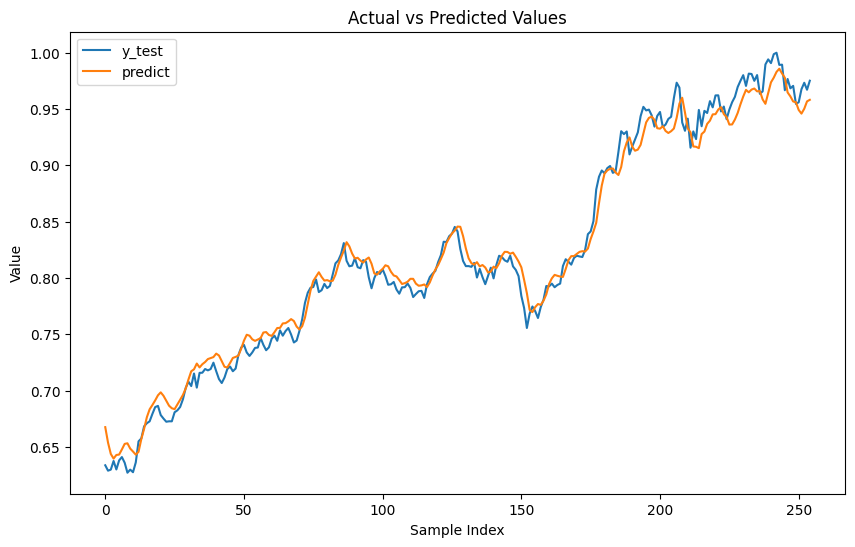

In [26]:
Y_pred=model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f"Root Mean Square Error (RMSE): {rmse}")

# Calculate MAPE for the test set
mape = mean_absolute_percentage_error(Y_test, Y_pred) 
print(f"Mean Absolute Percentage Error (MAPE): {mape:}")
plt.figure(figsize=(10, 6))
plt.plot(Y_test,label="y_test")
plt.plot(Y_pred,label="predict")
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')


# DNN

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Function for data preprocessing
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

# Function for creating dataset
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back)])
        Y.append(data[i + look_back])
    return np.array(X), np.array(Y)

# Parameters
file_path = 'nifty_data_2022_2024.csv'  # File path to the CSV file
look_back = 20
epochs = 100
batch_size = 32

# Read data from CSV file
stock_data = pd.read_csv(file_path)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)

# Preprocess data
scaled_data, scaler = preprocess_data(stock_data[['Close']].values)

# Create dataset
X, Y = create_dataset(scaled_data, look_back)

# Reshape data for DNN model
X = np.reshape(X, (X.shape[0], look_back))

# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Define the DNN model
model = Sequential([
    Dense(256, activation='relu', input_shape=(look_back,)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test), verbose=2)

# Evaluate the model
train_loss = model.evaluate(X_train, Y_train, verbose=0)
test_loss = model.evaluate(X_test, Y_test, verbose=0)
print(f"Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
32/32 - 5s - 146ms/step - loss: 0.0214 - val_loss: 0.0165
Epoch 2/100
32/32 - 0s - 9ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 3/100
32/32 - 0s - 9ms/step - loss: 0.0021 - val_loss: 0.0070
Epoch 4/100
32/32 - 0s - 8ms/step - loss: 0.0016 - val_loss: 0.0070
Epoch 5/100
32/32 - 0s - 8ms/step - loss: 0.0012 - val_loss: 0.0126
Epoch 6/100
32/32 - 0s - 9ms/step - loss: 0.0011 - val_loss: 0.0101
Epoch 7/100
32/32 - 0s - 9ms/step - loss: 9.7025e-04 - val_loss: 0.0105
Epoch 8/100
32/32 - 0s - 8ms/step - loss: 9.4211e-04 - val_loss: 0.0190
Epoch 9/100
32/32 - 0s - 9ms/step - loss: 8.0317e-04 - val_loss: 0.0237
Epoch 10/100
32/32 - 0s - 8ms/step - loss: 0.0010 - val_loss: 0.0123
Epoch 11/100
32/32 - 0s - 10ms/step - loss: 9.6380e-04 - val_loss: 0.0156
Epoch 12/100
32/32 - 0s - 11ms/step - loss: 8.4646e-04 - val_loss: 0.0195
Epoch 13/100
32/32 - 1s - 19ms/step - loss: 6.6978e-04 - val_loss: 0.0191
Epoch 14/100
32/32 - 0s - 9ms/step - loss: 6.6647e-04 - val_loss: 0.0200
Epoch 15/1

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Root Mean Square Error (RMSE): 0.1585
Mean Absolute Percentage Error (MAPE): 0.18984765235055387


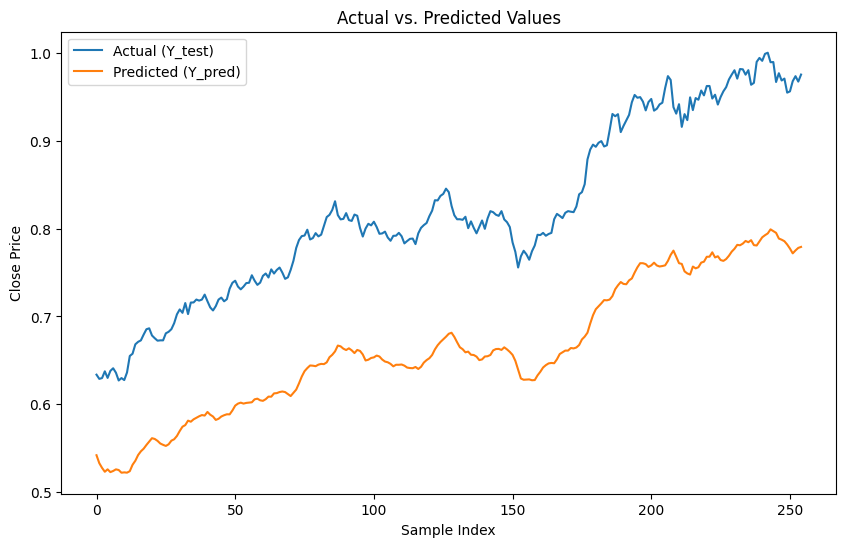

In [43]:

# Predict values on the test set
Y_pred = model.predict(X_test)

# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
mape = mean_absolute_percentage_error(Y_test, Y_pred)

# Print RMSE and MAPE
print(f"Root Mean Square Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(Y_test, label="Actual (Y_test)")
plt.plot(Y_pred, label="Predicted (Y_pred)")
plt.legend()
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Close Price')
plt.show()


# for nikkie dataset from 2020-2024

# LSTM

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Preprocess data
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

# Create dataset
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Set parameters
file_path = 'nikkei_data_2022_2024.csv'  # File path to the CSV file
look_back = 20
epochs = 100
batch_size = 32

# Read data from CSV file
stock_data = pd.read_csv(file_path)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data.set_index('Date')

# Preprocess data
scaled_data, scaler = preprocess_data(stock_data[['Close']].values)

# Create dataset
X, Y = create_dataset(scaled_data, look_back)

# Reshape data for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split data into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Define the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test), verbose=2)

# Evaluate the model
train_loss = model.evaluate(X_train, Y_train, verbose=0)
test_loss = model.evaluate(X_test, Y_test, verbose=0)
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
32/32 - 6s - 185ms/step - loss: 0.0202 - val_loss: 0.0037
Epoch 2/100
32/32 - 1s - 27ms/step - loss: 0.0020 - val_loss: 0.0081
Epoch 3/100
32/32 - 0s - 16ms/step - loss: 0.0010 - val_loss: 0.0018
Epoch 4/100
32/32 - 0s - 15ms/step - loss: 8.5315e-04 - val_loss: 0.0015
Epoch 5/100
32/32 - 1s - 22ms/step - loss: 8.3439e-04 - val_loss: 0.0012
Epoch 6/100
32/32 - 1s - 18ms/step - loss: 8.3108e-04 - val_loss: 0.0011
Epoch 7/100
32/32 - 1s - 25ms/step - loss: 8.2627e-04 - val_loss: 0.0014
Epoch 8/100
32/32 - 1s - 17ms/step - loss: 7.9638e-04 - val_loss: 9.0154e-04
Epoch 9/100
32/32 - 1s - 24ms/step - loss: 8.0310e-04 - val_loss: 0.0018
Epoch 10/100
32/32 - 1s - 18ms/step - loss: 7.5399e-04 - val_loss: 8.6769e-04
Epoch 11/100
32/32 - 1s - 16ms/step - loss: 7.2023e-04 - val_loss: 0.0012
Epoch 12/100
32/32 - 1s - 16ms/step - loss: 7.0494e-04 - val_loss: 9.2644e-04
Epoch 13/100
32/32 - 1s - 19ms/step - loss: 7.1997e-04 - val_loss: 9.4350e-04
Epoch 14/100
32/32 - 1s - 20ms/step - loss

In [20]:
# Number of future predictions
num_predictions = 100

# Initialize an empty list to store the predictions
predictions = []

# Initial input sequence (last sequence from the training data)
current_sequence = X_test[-1]

# Iterate to predict the next 100 values
for i in range(num_predictions):
    # Reshape current_sequence to match the model input shape
    current_sequence_reshaped = current_sequence.reshape(1, 20,1)
    
    # Predict the next value
    next_prediction = model.predict(current_sequence_reshaped)
    
    # Append the prediction to the list of predictions
    predictions.append(next_prediction[0])
    
    # Update the input sequence by removing the first element and adding the prediction
    current_sequence = np.append(current_sequence[1:], next_prediction[0])

# Transform predictions back to original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Print the predicted values
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
Root Mean Square Error (RMSE): 0.022976827030385116
Mean Absolute Percentage Error (MAPE): 0.02684486992903008


Text(0, 0.5, 'Value')

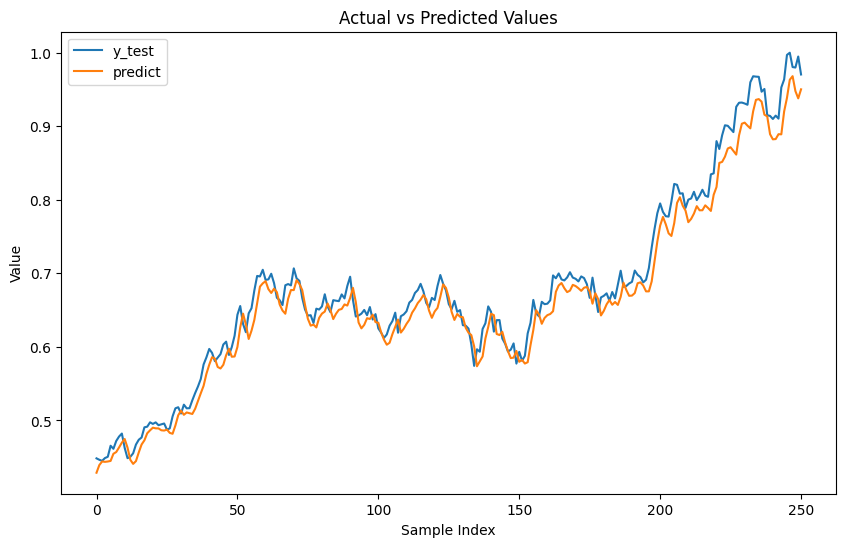

In [21]:
Y_pred=model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f"Root Mean Square Error (RMSE): {rmse}")

# Calculate MAPE for the test set
mape = mean_absolute_percentage_error(Y_test, Y_pred) 
print(f"Mean Absolute Percentage Error (MAPE): {mape:}")
plt.figure(figsize=(10, 6))
plt.plot(Y_test,label="y_test")
plt.plot(Y_pred,label="predict")
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')


# GRU

In [44]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Preprocess data
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

# Create dataset
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Set parameters
file_path = 'nikkei_data_2022_2024.csv'  # File path to the CSV file
look_back = 20
epochs = 100
batch_size = 32

# Read data from CSV file
stock_data = pd.read_csv(file_path)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data.set_index('Date')

# Preprocess data
scaled_data, scaler = preprocess_data(stock_data[['Close']].values)

# Create dataset
X, Y = create_dataset(scaled_data, look_back)

# Reshape data for GRU
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split data into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Define the GRU model
model = Sequential([
    GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    GRU(units=50),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test), verbose=2)

# Evaluate the model
train_loss = model.evaluate(X_train, Y_train, verbose=0)
test_loss = model.evaluate(X_test, Y_test, verbose=0)
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
32/32 - 11s - 339ms/step - loss: 0.0213 - val_loss: 0.0186
Epoch 2/100
32/32 - 1s - 40ms/step - loss: 0.0016 - val_loss: 0.0033
Epoch 3/100
32/32 - 1s - 41ms/step - loss: 5.3865e-04 - val_loss: 8.2522e-04
Epoch 4/100
32/32 - 1s - 42ms/step - loss: 3.8016e-04 - val_loss: 5.2081e-04
Epoch 5/100
32/32 - 1s - 40ms/step - loss: 3.5845e-04 - val_loss: 4.8185e-04
Epoch 6/100
32/32 - 1s - 39ms/step - loss: 3.4352e-04 - val_loss: 3.8933e-04
Epoch 7/100
32/32 - 1s - 40ms/step - loss: 3.3129e-04 - val_loss: 4.2185e-04
Epoch 8/100
32/32 - 1s - 40ms/step - loss: 3.0850e-04 - val_loss: 3.6337e-04
Epoch 9/100
32/32 - 1s - 42ms/step - loss: 3.0183e-04 - val_loss: 3.7406e-04
Epoch 10/100
32/32 - 1s - 41ms/step - loss: 2.9131e-04 - val_loss: 3.8749e-04
Epoch 11/100
32/32 - 1s - 42ms/step - loss: 2.7773e-04 - val_loss: 3.9736e-04
Epoch 12/100
32/32 - 1s - 42ms/step - loss: 2.7572e-04 - val_loss: 3.1362e-04
Epoch 13/100
32/32 - 3s - 85ms/step - loss: 2.7261e-04 - val_loss: 3.1717e-04
Epoch 14/

In [45]:
import numpy as np

# Number of future predictions
num_predictions = 100

# Initialize the list for storing predictions
predictions = []

# Retrieve the last input sequence from the test data
current_sequence = X_test[-1]

# Predict future values using the GRU model
for i in range(num_predictions):
    # Reshape the current sequence to match the input shape expected by the GRU model
    current_sequence_reshaped = current_sequence.reshape(1, look_back, 1)
    
    # Predict the next value using the GRU model
    next_prediction = model.predict(current_sequence_reshaped)
    
    # Append the predicted value to the predictions list
    predictions.append(next_prediction[0, 0])  # Store only the first value from the prediction
    
    # Shift the current sequence left by one element and insert the new prediction at the end
    current_sequence = np.roll(current_sequence, -1, axis=0)
    current_sequence[-1] = next_prediction[0, 0]  # Update with only the first predicted value

# Convert predictions list to numpy array
predictions = np.array(predictions)

# Reshape predictions array to match the expected shape for inverse transformation
predictions_reshaped = predictions.reshape(-1, 1)

# Transform predictions back to the original scale using the scaler
inverse_transformed_predictions = scaler.inverse_transform(predictions_reshaped)

# Output the predictions
print("Future predictions for the next 100 days:")
print(inverse_transformed_predictions.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
Root Mean Square Error (RMSE): 0.014840438716574332
Mean Absolute Percentage Error (MAPE): 0.01692898028815488


Text(0, 0.5, 'Value')

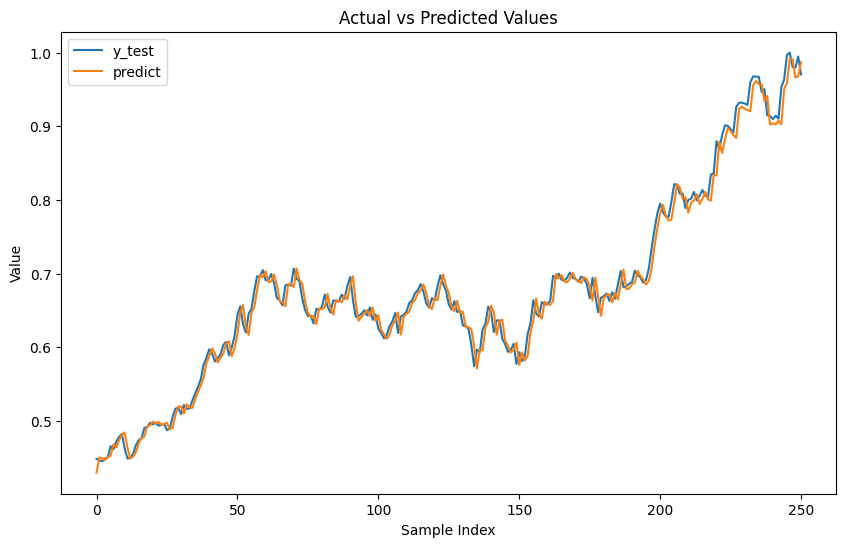

In [23]:
Y_pred=model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f"Root Mean Square Error (RMSE): {rmse}")

# Calculate MAPE for the test set
mape = mean_absolute_percentage_error(Y_test, Y_pred) 
print(f"Mean Absolute Percentage Error (MAPE): {mape:}")
plt.figure(figsize=(10, 6))
plt.plot(Y_test,label="y_test")
plt.plot(Y_pred,label="predict")
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')


# CNN1D

In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Preprocess data
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

# Create dataset
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Set parameters
file_path = 'nikkei_data_2022_2024.csv'  # File path to the CSV file
look_back = 20
epochs = 100
batch_size = 32

# Read data from CSV file
stock_data = pd.read_csv(file_path)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data.set_index('Date')

# Preprocess data
scaled_data, scaler = preprocess_data(stock_data[['Close']].values)

# Create dataset
X, Y = create_dataset(scaled_data, look_back)

# Reshape data for CNN
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split data into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Define the CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test), verbose=2)

# Evaluate the model
train_loss = model.evaluate(X_train, Y_train, verbose=0)
test_loss = model.evaluate(X_test, Y_test, verbose=0)
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
32/32 - 3s - 94ms/step - loss: 0.0215 - val_loss: 0.0063
Epoch 2/100
32/32 - 0s - 9ms/step - loss: 0.0019 - val_loss: 0.0049
Epoch 3/100
32/32 - 0s - 10ms/step - loss: 0.0014 - val_loss: 0.0038
Epoch 4/100
32/32 - 0s - 9ms/step - loss: 0.0013 - val_loss: 0.0040
Epoch 5/100
32/32 - 0s - 9ms/step - loss: 0.0012 - val_loss: 0.0031
Epoch 6/100
32/32 - 0s - 10ms/step - loss: 0.0012 - val_loss: 0.0038
Epoch 7/100
32/32 - 0s - 11ms/step - loss: 0.0011 - val_loss: 0.0037
Epoch 8/100
32/32 - 0s - 11ms/step - loss: 0.0011 - val_loss: 0.0032
Epoch 9/100
32/32 - 0s - 9ms/step - loss: 0.0010 - val_loss: 0.0027
Epoch 10/100
32/32 - 0s - 9ms/step - loss: 9.7591e-04 - val_loss: 0.0031
Epoch 11/100
32/32 - 0s - 9ms/step - loss: 8.4841e-04 - val_loss: 0.0025
Epoch 12/100
32/32 - 0s - 9ms/step - loss: 8.2467e-04 - val_loss: 0.0024
Epoch 13/100
32/32 - 0s - 12ms/step - loss: 7.6065e-04 - val_loss: 0.0032
Epoch 14/100
32/32 - 0s - 11ms/step - loss: 7.1925e-04 - val_loss: 0.0029
Epoch 15/100
32/

In [47]:
import numpy as np

# Number of future predictions
num_predictions = 100

# Initialize the list for storing predictions
predictions = []

# Retrieve the last input sequence from the test data
current_sequence = X_test[-1]

# Predict future values using the GRU model
for i in range(num_predictions):
    # Reshape the current sequence to match the input shape expected by the GRU model
    current_sequence_reshaped = current_sequence.reshape(1, look_back, 1)
    
    # Predict the next value using the GRU model
    next_prediction = model.predict(current_sequence_reshaped)
    
    # Append the predicted value to the predictions list
    predictions.append(next_prediction[0, 0])  # Store only the first value from the prediction
    
    # Shift the current sequence left by one element and insert the new prediction at the end
    current_sequence = np.roll(current_sequence, -1, axis=0)
    current_sequence[-1] = next_prediction[0, 0]  # Update with only the first predicted value

# Convert predictions list to numpy array
predictions = np.array(predictions)

# Reshape predictions array to match the expected shape for inverse transformation
predictions_reshaped = predictions.reshape(-1, 1)

# Transform predictions back to the original scale using the scaler
inverse_transformed_predictions = scaler.inverse_transform(predictions_reshaped)

# Output the predictions
print("Future predictions for the next 100 days:")
print(inverse_transformed_predictions.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
Root Mean Square Error (RMSE): 0.03750090353210937
Mean Absolute Percentage Error (MAPE): 0.03774031235581232


Text(0, 0.5, 'Value')

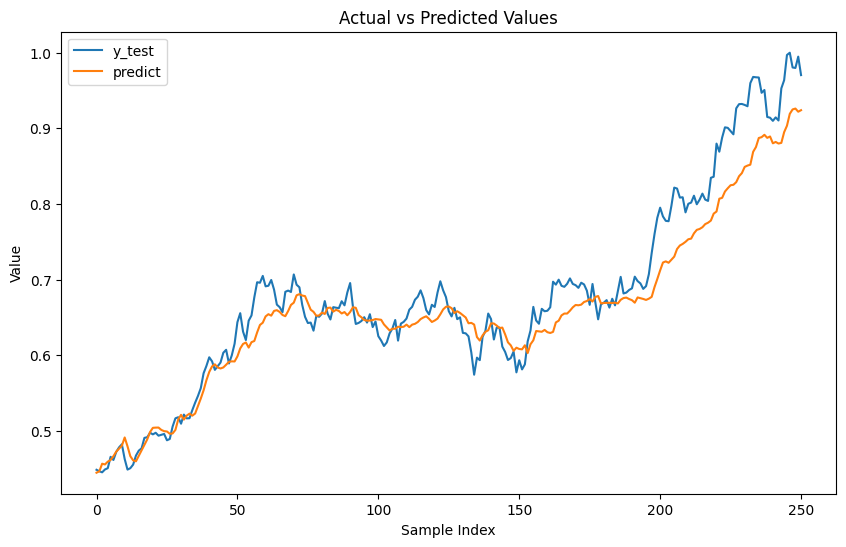

In [48]:
Y_pred=model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f"Root Mean Square Error (RMSE): {rmse}")

# Calculate MAPE for the test set
mape = mean_absolute_percentage_error(Y_test, Y_pred) 
print(f"Mean Absolute Percentage Error (MAPE): {mape:}")
plt.figure(figsize=(10, 6))
plt.plot(Y_test,label="y_test")
plt.plot(Y_pred,label="predict")
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')


# RNN

In [49]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Preprocess data
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

# Create dataset
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Set parameters
file_path = 'nifty_data_2022_2024.csv'  # File path to the CSV file
look_back = 20
epochs = 100
batch_size = 32

# Read data from CSV file
stock_data = pd.read_csv(file_path)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data.set_index('Date')

# Preprocess data
scaled_data, scaler = preprocess_data(stock_data[['Close']].values)

# Create dataset
X, Y = create_dataset(scaled_data, look_back)

# Reshape data for SimpleRNN
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split data into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Define the SimpleRNN model
model = Sequential([
    SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    SimpleRNN(units=50),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test), verbose=2)

# Evaluate the model
train_loss = model.evaluate(X_train, Y_train, verbose=0)
test_loss = model.evaluate(X_test, Y_test, verbose=0)
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
32/32 - 12s - 383ms/step - loss: 0.0898 - val_loss: 0.0060
Epoch 2/100
32/32 - 1s - 20ms/step - loss: 0.0025 - val_loss: 0.0061
Epoch 3/100
32/32 - 1s - 20ms/step - loss: 6.3585e-04 - val_loss: 0.0050
Epoch 4/100
32/32 - 1s - 21ms/step - loss: 3.8459e-04 - val_loss: 0.0029
Epoch 5/100
32/32 - 1s - 20ms/step - loss: 3.7606e-04 - val_loss: 0.0019
Epoch 6/100
32/32 - 1s - 20ms/step - loss: 3.7187e-04 - val_loss: 0.0024
Epoch 7/100
32/32 - 1s - 20ms/step - loss: 3.1353e-04 - val_loss: 0.0022
Epoch 8/100
32/32 - 1s - 20ms/step - loss: 2.8930e-04 - val_loss: 0.0012
Epoch 9/100
32/32 - 1s - 20ms/step - loss: 3.2071e-04 - val_loss: 0.0018
Epoch 10/100
32/32 - 1s - 21ms/step - loss: 3.6236e-04 - val_loss: 0.0017
Epoch 11/100
32/32 - 1s - 20ms/step - loss: 2.9565e-04 - val_loss: 0.0015
Epoch 12/100
32/32 - 1s - 20ms/step - loss: 2.9351e-04 - val_loss: 0.0016
Epoch 13/100
32/32 - 1s - 20ms/step - loss: 2.7621e-04 - val_loss: 0.0013
Epoch 14/100
32/32 - 1s - 23ms/step - loss: 3.3951e-0

In [50]:
import numpy as np

# Number of future predictions
num_predictions = 100

# Initialize the list for storing predictions
predictions = []

# Retrieve the last input sequence from the test data
current_sequence = X_test[-1]

# Predict future values using the GRU model
for i in range(num_predictions):
    # Reshape the current sequence to match the input shape expected by the GRU model
    current_sequence_reshaped = current_sequence.reshape(1, look_back, 1)
    
    # Predict the next value using the GRU model
    next_prediction = model.predict(current_sequence_reshaped)
    
    # Append the predicted value to the predictions list
    predictions.append(next_prediction[0, 0])  # Store only the first value from the prediction
    
    # Shift the current sequence left by one element and insert the new prediction at the end
    current_sequence = np.roll(current_sequence, -1, axis=0)
    current_sequence[-1] = next_prediction[0, 0]  # Update with only the first predicted value

# Convert predictions list to numpy array
predictions = np.array(predictions)

# Reshape predictions array to match the expected shape for inverse transformation
predictions_reshaped = predictions.reshape(-1, 1)

# Transform predictions back to the original scale using the scaler
inverse_transformed_predictions = scaler.inverse_transform(predictions_reshaped)

# Output the predictions
print("Future predictions for the next 100 days:")
print(inverse_transformed_predictions.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Root Mean Square Error (RMSE): 0.02991011385690694
Mean Absolute Percentage Error (MAPE): 0.02952251867598406


Text(0, 0.5, 'Value')

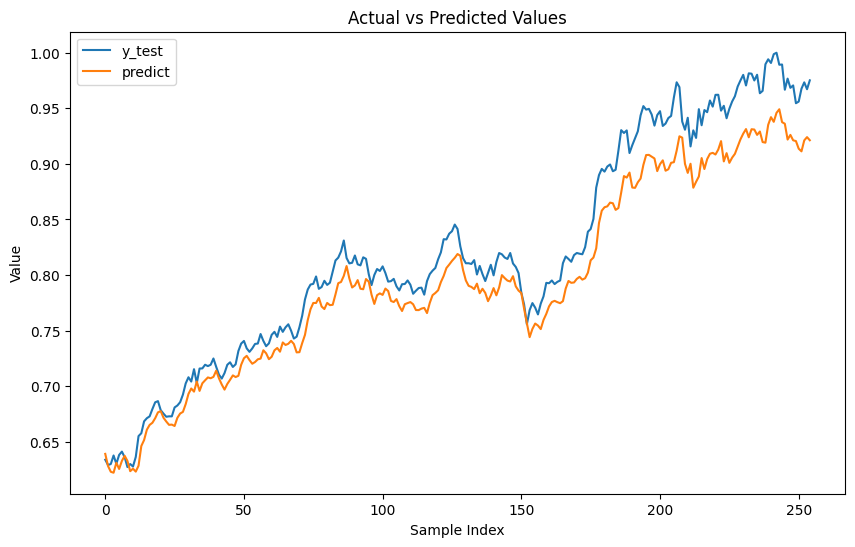

In [51]:
Y_pred=model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f"Root Mean Square Error (RMSE): {rmse}")

# Calculate MAPE for the test set
mape = mean_absolute_percentage_error(Y_test, Y_pred) 
print(f"Mean Absolute Percentage Error (MAPE): {mape:}")
plt.figure(figsize=(10, 6))
plt.plot(Y_test,label="y_test")
plt.plot(Y_pred,label="predict")
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')


# BI-LSTM

In [52]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, LSTM

# Preprocess data
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

# Create dataset
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Set parameters
file_path = 'nikkei_data_2022_2024.csv'  # File path to the CSV file
look_back = 20
epochs = 100
batch_size = 32

# Read data from CSV file
stock_data = pd.read_csv(file_path)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data.set_index('Date')

# Preprocess data
scaled_data, scaler = preprocess_data(stock_data[['Close']].values)

# Create dataset
X, Y = create_dataset(scaled_data, look_back)

# Reshape data for Bidirectional LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split data into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Define the Bidirectional LSTM model
model = Sequential([
    Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], 1)),
    Bidirectional(LSTM(units=50)),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test), verbose=2)

# Evaluate the model
train_loss = model.evaluate(X_train, Y_train, verbose=0)
test_loss = model.evaluate(X_test, Y_test, verbose=0)
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
32/32 - 17s - 542ms/step - loss: 0.0145 - val_loss: 0.0038
Epoch 2/100
32/32 - 1s - 47ms/step - loss: 0.0015 - val_loss: 0.0053
Epoch 3/100
32/32 - 3s - 82ms/step - loss: 0.0011 - val_loss: 0.0026
Epoch 4/100
32/32 - 3s - 89ms/step - loss: 0.0011 - val_loss: 0.0030
Epoch 5/100
32/32 - 2s - 55ms/step - loss: 0.0010 - val_loss: 0.0032
Epoch 6/100
32/32 - 2s - 49ms/step - loss: 9.3620e-04 - val_loss: 0.0032
Epoch 7/100
32/32 - 2s - 48ms/step - loss: 9.2330e-04 - val_loss: 0.0023
Epoch 8/100
32/32 - 2s - 48ms/step - loss: 8.5658e-04 - val_loss: 0.0021
Epoch 9/100
32/32 - 2s - 48ms/step - loss: 7.6666e-04 - val_loss: 0.0029
Epoch 10/100
32/32 - 2s - 50ms/step - loss: 7.7884e-04 - val_loss: 0.0016
Epoch 11/100
32/32 - 2s - 51ms/step - loss: 6.3724e-04 - val_loss: 8.2217e-04
Epoch 12/100
32/32 - 2s - 48ms/step - loss: 6.6096e-04 - val_loss: 0.0017
Epoch 13/100
32/32 - 2s - 47ms/step - loss: 6.5041e-04 - val_loss: 0.0011
Epoch 14/100
32/32 - 2s - 47ms/step - loss: 5.0663e-04 - val_

In [53]:
import numpy as np

# Number of future predictions
num_predictions = 100

# Initialize the list for storing predictions
predictions = []

# Retrieve the last input sequence from the test data
current_sequence = X_test[-1]

# Predict future values using the GRU model
for i in range(num_predictions):
    # Reshape the current sequence to match the input shape expected by the GRU model
    current_sequence_reshaped = current_sequence.reshape(1, look_back, 1)
    
    # Predict the next value using the GRU model
    next_prediction = model.predict(current_sequence_reshaped)
    
    # Append the predicted value to the predictions list
    predictions.append(next_prediction[0, 0])  # Store only the first value from the prediction
    
    # Shift the current sequence left by one element and insert the new prediction at the end
    current_sequence = np.roll(current_sequence, -1, axis=0)
    current_sequence[-1] = next_prediction[0, 0]  # Update with only the first predicted value

# Convert predictions list to numpy array
predictions = np.array(predictions)

# Reshape predictions array to match the expected shape for inverse transformation
predictions_reshaped = predictions.reshape(-1, 1)

# Transform predictions back to the original scale using the scaler
inverse_transformed_predictions = scaler.inverse_transform(predictions_reshaped)

# Output the predictions
print("Future predictions for the next 100 days:")
print(inverse_transformed_predictions.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step
Root Mean Square Error (RMSE): 0.01870131254037498
Mean Absolute Percentage Error (MAPE): 0.020917563361400247


Text(0, 0.5, 'Value')

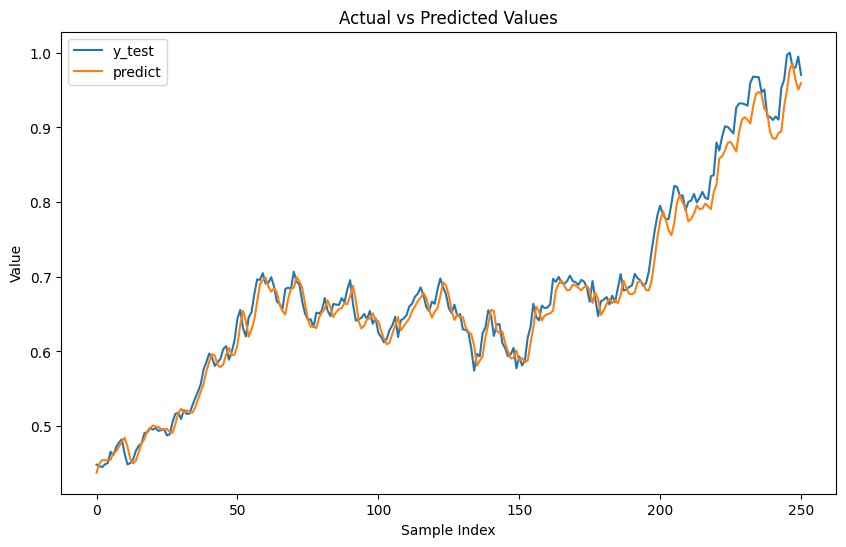

In [54]:
Y_pred=model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f"Root Mean Square Error (RMSE): {rmse}")

# Calculate MAPE for the test set
mape = mean_absolute_percentage_error(Y_test, Y_pred) 
print(f"Mean Absolute Percentage Error (MAPE): {mape:}")
plt.figure(figsize=(10, 6))
plt.plot(Y_test,label="y_test")
plt.plot(Y_pred,label="predict")
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')


# DNN

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Function for data preprocessing
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

# Function for creating dataset
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back)])
        Y.append(data[i + look_back])
    return np.array(X), np.array(Y)

# Parameters
file_path = 'nifty_data_2022_2024.csv'  # File path to the CSV file
look_back = 20
epochs = 100
batch_size = 32

# Read data from CSV file
stock_data = pd.read_csv(file_path)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)

# Preprocess data
scaled_data, scaler = preprocess_data(stock_data[['Close']].values)

# Create dataset
X, Y = create_dataset(scaled_data, look_back)

# Reshape data for DNN model
X = np.reshape(X, (X.shape[0], look_back))

# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Define the DNN model
model = Sequential([
    Dense(256, activation='relu', input_shape=(look_back,)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test), verbose=2)

# Evaluate the model
train_loss = model.evaluate(X_train, Y_train, verbose=0)
test_loss = model.evaluate(X_test, Y_test, verbose=0)
print(f"Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
32/32 - 4s - 139ms/step - loss: 0.0236 - val_loss: 0.0127
Epoch 2/100
32/32 - 0s - 9ms/step - loss: 0.0024 - val_loss: 0.0081
Epoch 3/100
32/32 - 0s - 9ms/step - loss: 0.0017 - val_loss: 0.0048
Epoch 4/100
32/32 - 0s - 11ms/step - loss: 0.0016 - val_loss: 0.0073
Epoch 5/100
32/32 - 0s - 9ms/step - loss: 0.0012 - val_loss: 0.0135
Epoch 6/100
32/32 - 0s - 9ms/step - loss: 0.0012 - val_loss: 0.0064
Epoch 7/100
32/32 - 0s - 9ms/step - loss: 9.2386e-04 - val_loss: 0.0121
Epoch 8/100
32/32 - 0s - 8ms/step - loss: 8.7648e-04 - val_loss: 0.0107
Epoch 9/100
32/32 - 0s - 9ms/step - loss: 8.3592e-04 - val_loss: 0.0143
Epoch 10/100
32/32 - 0s - 10ms/step - loss: 6.4309e-04 - val_loss: 0.0223
Epoch 11/100
32/32 - 0s - 10ms/step - loss: 6.8874e-04 - val_loss: 0.0195
Epoch 12/100
32/32 - 0s - 9ms/step - loss: 5.2064e-04 - val_loss: 0.0176
Epoch 13/100
32/32 - 0s - 8ms/step - loss: 6.3870e-04 - val_loss: 0.0183
Epoch 14/100
32/32 - 0s - 13ms/step - loss: 5.5629e-04 - val_loss: 0.0146
Epoch

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Root Mean Square Error (RMSE): 0.1322
Mean Absolute Percentage Error (MAPE): 0.15794955394021082


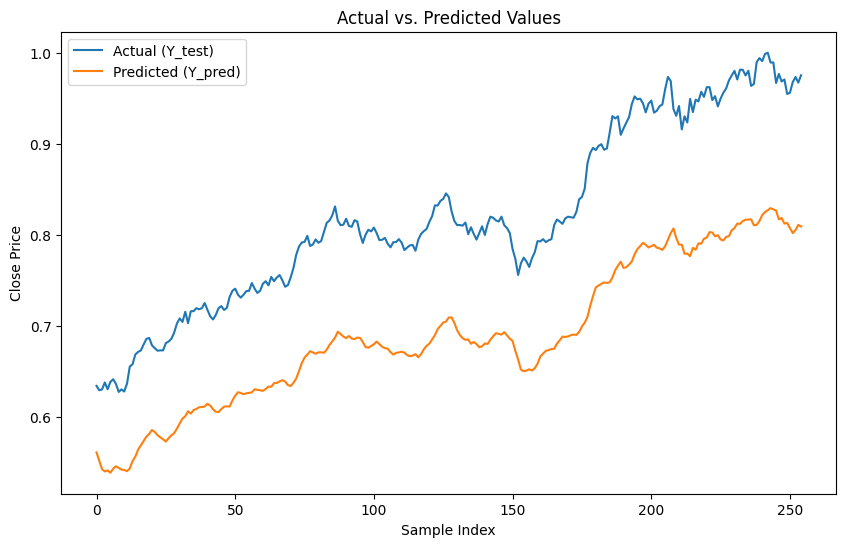

In [18]:

# Predict values on the test set
Y_pred = model.predict(X_test)

# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
mape = mean_absolute_percentage_error(Y_test, Y_pred)

# Print RMSE and MAPE
print(f"Root Mean Square Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(Y_test, label="Actual (Y_test)")
plt.plot(Y_pred, label="Predicted (Y_pred)")
plt.legend()
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Close Price')
plt.show()


# Sensex_data for 5years

# LSTM

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Preprocess data
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

# Create dataset
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Set parameters
file_path = 'sensex_data.csv'  # File path to the CSV file
look_back = 20  # Change this value to adjust the temporal context
epochs = 100  # Set epochs to 100
batch_size = 64  # Adjust batch size

# Read data from CSV file
stock_data = pd.read_csv(file_path)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data.set_index('Date')

# Preprocess data
scaled_data, scaler = preprocess_data(stock_data[['Close']].values)

# Create dataset
X, Y = create_dataset(scaled_data, look_back)

# Reshape data for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split data into train and test sets
train_size = int(len(X) * 0.8)  # Use 80% of data for training
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Define the LSTM model
model = Sequential([
    LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),  # Add dropout for regularization
    LSTM(units=50),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Add early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test), verbose=2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
16/16 - 11s - 673ms/step - loss: 0.0661 - mae: 0.1947 - val_loss: 0.0547 - val_mae: 0.2282
Epoch 2/100
16/16 - 2s - 107ms/step - loss: 0.0074 - mae: 0.0704 - val_loss: 0.0012 - val_mae: 0.0256
Epoch 3/100
16/16 - 1s - 68ms/step - loss: 0.0028 - mae: 0.0422 - val_loss: 0.0022 - val_mae: 0.0398
Epoch 4/100
16/16 - 1s - 82ms/step - loss: 0.0013 - mae: 0.0275 - val_loss: 0.0016 - val_mae: 0.0344
Epoch 5/100
16/16 - 1s - 64ms/step - loss: 0.0010 - mae: 0.0237 - val_loss: 8.7712e-04 - val_mae: 0.0239
Epoch 6/100
16/16 - 1s - 64ms/step - loss: 8.7307e-04 - mae: 0.0219 - val_loss: 6.5154e-04 - val_mae: 0.0203
Epoch 7/100
16/16 - 1s - 64ms/step - loss: 0.0010 - mae: 0.0220 - val_loss: 0.0014 - val_mae: 0.0316
Epoch 8/100
16/16 - 1s - 64ms/step - loss: 9.6037e-04 - mae: 0.0237 - val_loss: 0.0011 - val_mae: 0.0283
Epoch 9/100
16/16 - 1s - 65ms/step - loss: 9.0980e-04 - mae: 0.0222 - val_loss: 0.0010 - val_mae: 0.0260
Epoch 10/100
16/16 - 1s - 82ms/step - loss: 9.2554e-04 - mae: 0.0219

In [33]:
import numpy as np

# Number of future predictions
num_predictions = 100

# Initialize the list for storing predictions
predictions = []

# Retrieve the last input sequence from the test data
current_sequence = X_test[-1]

# Predict future values using the GRU model
for i in range(num_predictions):
    # Reshape the current sequence to match the input shape expected by the GRU model
    current_sequence_reshaped = current_sequence.reshape(1, look_back, 1)
    
    # Predict the next value using the GRU model
    next_prediction = model.predict(current_sequence_reshaped)
    
    # Append the predicted value to the predictions list
    predictions.append(next_prediction[0, 0])  # Store only the first value from the prediction
    
    # Shift the current sequence left by one element and insert the new prediction at the end
    current_sequence = np.roll(current_sequence, -1, axis=0)
    current_sequence[-1] = next_prediction[0, 0]  # Update with only the first predicted value

# Convert predictions list to numpy array
predictions = np.array(predictions)

# Reshape predictions array to match the expected shape for inverse transformation
predictions_reshaped = predictions.reshape(-1, 1)

# Transform predictions back to the original scale using the scaler
inverse_transformed_predictions = scaler.inverse_transform(predictions_reshaped)

# Output the predictions
print("Future predictions for the next 100 days:")
print(inverse_transformed_predictions.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Root Mean Square Error (RMSE): 0.01989984398155572
Mean Absolute Percentage Error (MAPE): 0.018358849719345767


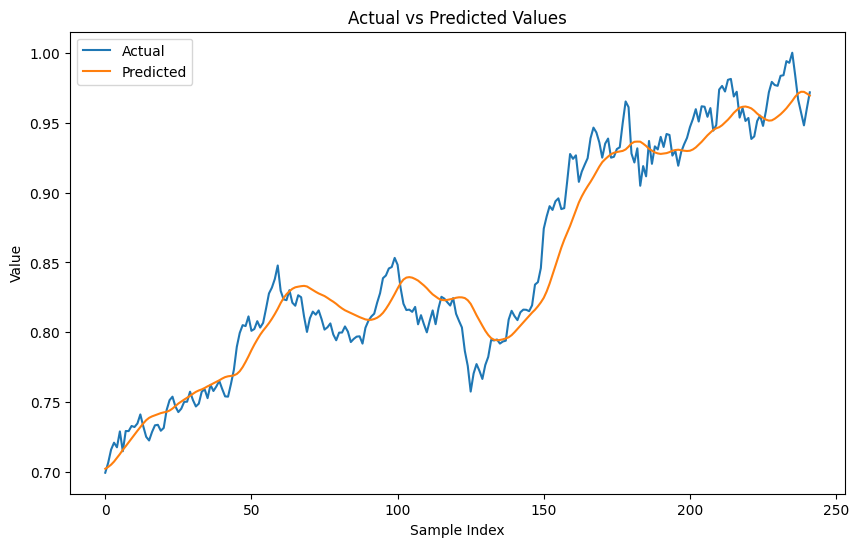

In [34]:

# Make predictions
Y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f"Root Mean Square Error (RMSE): {rmse}")

# Calculate MAPE
mape = mean_absolute_percentage_error(Y_test, Y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(Y_test, label='Actual')
plt.plot(Y_pred, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()


# GRU

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Function to preprocess data
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

# Function to create dataset
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back)])
        Y.append(data[i + look_back])
    return np.array(X), np.array(Y)

# Set parameters
file_path = 'sensex_data.csv'  # File path to the CSV file
look_back = 20
epochs = 100
batch_size = 32

# Read data from CSV file
stock_data = pd.read_csv(file_path)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)

# Preprocess data
scaled_data, scaler = preprocess_data(stock_data[['Close']].values)

# Create dataset
X, Y = create_dataset(scaled_data, look_back)

# Reshape data for GRU
X = np.reshape(X, (X.shape[0], look_back, 1))

# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Define the GRU model with dropout layers for regularization
model = Sequential([
    GRU(units=50, return_sequences=True, input_shape=(look_back, 1)),
    Dropout(0.2),  # Dropout layer for regularization
    GRU(units=50),
    Dropout(0.2),  # Dropout layer for regularization
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define an early stopping callback to stop training when validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test), verbose=2, callbacks=[early_stopping])

# Evaluate the model
train_loss = model.evaluate(X_train, Y_train, verbose=0)
test_loss = model.evaluate(X_test, Y_test, verbose=0)
print(f"Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
31/31 - 13s - 420ms/step - loss: 0.0463 - val_loss: 0.0432
Epoch 2/100
31/31 - 1s - 44ms/step - loss: 0.0059 - val_loss: 0.0067
Epoch 3/100
31/31 - 3s - 83ms/step - loss: 0.0036 - val_loss: 7.8061e-04
Epoch 4/100
31/31 - 1s - 44ms/step - loss: 0.0031 - val_loss: 3.5777e-04
Epoch 5/100
31/31 - 3s - 84ms/step - loss: 0.0027 - val_loss: 7.4364e-04
Epoch 6/100
31/31 - 1s - 44ms/step - loss: 0.0028 - val_loss: 2.5456e-04
Epoch 7/100
31/31 - 3s - 84ms/step - loss: 0.0027 - val_loss: 4.5679e-04
Epoch 8/100
31/31 - 1s - 42ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 9/100
31/31 - 1s - 45ms/step - loss: 0.0025 - val_loss: 2.5436e-04
Epoch 10/100
31/31 - 1s - 43ms/step - loss: 0.0022 - val_loss: 2.7185e-04
Epoch 11/100
31/31 - 1s - 44ms/step - loss: 0.0022 - val_loss: 2.2700e-04
Epoch 12/100
31/31 - 1s - 45ms/step - loss: 0.0022 - val_loss: 7.1490e-04
Epoch 13/100
31/31 - 1s - 43ms/step - loss: 0.0019 - val_loss: 4.8647e-04
Epoch 14/100
31/31 - 1s - 45ms/step - loss: 0.0019 - val_

In [3]:
import numpy as np

# Number of future predictions
num_predictions = 100

# Initialize the list for storing predictions
predictions = []

# Retrieve the last input sequence from the test data
current_sequence = X_test[-1]

# Predict future values using the GRU model
for i in range(num_predictions):
    # Reshape the current sequence to match the input shape expected by the GRU model
    current_sequence_reshaped = current_sequence.reshape(1, look_back, 1)
    
    # Predict the next value using the GRU model
    next_prediction = model.predict(current_sequence_reshaped)
    
    # Append the predicted value to the predictions list
    predictions.append(next_prediction[0, 0])  # Store only the first value from the prediction
    
    # Shift the current sequence left by one element and insert the new prediction at the end
    current_sequence = np.roll(current_sequence, -1, axis=0)
    current_sequence[-1] = next_prediction[0, 0]  # Update with only the first predicted value

# Convert predictions list to numpy array
predictions = np.array(predictions)

# Reshape predictions array to match the expected shape for inverse transformation
predictions_reshaped = predictions.reshape(-1, 1)

# Transform predictions back to the original scale using the scaler
inverse_transformed_predictions = scaler.inverse_transform(predictions_reshaped)

# Output the predictions
print("Future predictions for the next 100 days:")
print(inverse_transformed_predictions.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Root Mean Square Error (RMSE): 0.0136
Mean Absolute Percentage Error (MAPE): 0.012427108761052187


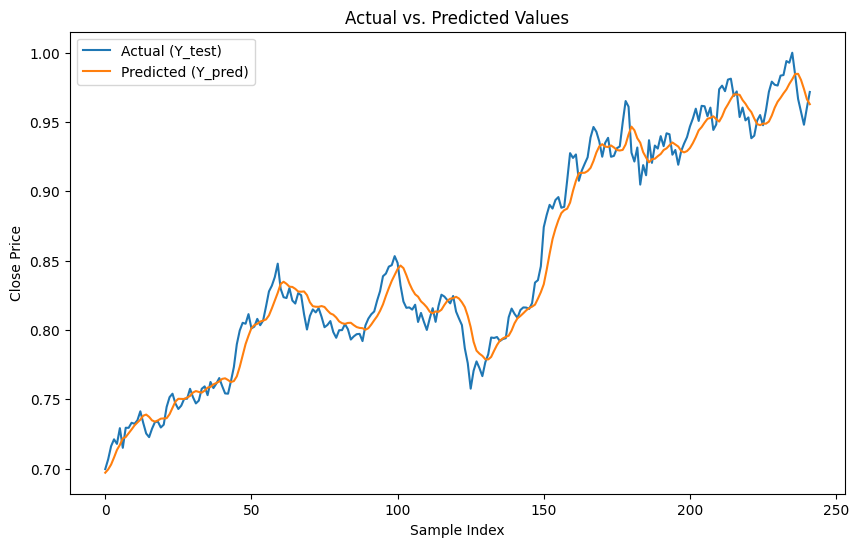

In [4]:

# Predict values on the test set
Y_pred = model.predict(X_test)

# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
mape = mean_absolute_percentage_error(Y_test, Y_pred)

# Print RMSE and MAPE
print(f"Root Mean Square Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(Y_test, label="Actual (Y_test)")
plt.plot(Y_pred, label="Predicted (Y_pred)")
plt.legend()
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Close Price')
plt.show()


# CNN1D

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Preprocess data
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

# Create dataset
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Set parameters
file_path ='sensex_data.csv' # File path to the CSV file
look_back = 20
epochs = 100
batch_size = 32

# Read data from CSV file
stock_data = pd.read_csv(file_path)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data.set_index('Date')

# Preprocess data
scaled_data, scaler = preprocess_data(stock_data[['Close']].values)

# Create dataset
X, Y = create_dataset(scaled_data, look_back)

# Reshape data for CNN
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split data into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Define the CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test), verbose=2)

# Evaluate the model
train_loss = model.evaluate(X_train, Y_train, verbose=0)
test_loss = model.evaluate(X_test, Y_test, verbose=0)
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
31/31 - 3s - 90ms/step - loss: 0.0551 - val_loss: 6.2031e-04
Epoch 2/100
31/31 - 0s - 12ms/step - loss: 0.0024 - val_loss: 9.7445e-04
Epoch 3/100
31/31 - 0s - 13ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 4/100
31/31 - 1s - 20ms/step - loss: 0.0010 - val_loss: 5.6248e-04
Epoch 5/100
31/31 - 0s - 12ms/step - loss: 9.7325e-04 - val_loss: 5.0676e-04
Epoch 6/100
31/31 - 0s - 13ms/step - loss: 9.2527e-04 - val_loss: 5.9884e-04
Epoch 7/100
31/31 - 0s - 13ms/step - loss: 8.9335e-04 - val_loss: 6.2021e-04
Epoch 8/100
31/31 - 0s - 14ms/step - loss: 8.5801e-04 - val_loss: 7.4351e-04
Epoch 9/100
31/31 - 0s - 13ms/step - loss: 8.2039e-04 - val_loss: 7.5194e-04
Epoch 10/100
31/31 - 0s - 13ms/step - loss: 7.9989e-04 - val_loss: 0.0011
Epoch 11/100
31/31 - 0s - 12ms/step - loss: 7.5550e-04 - val_loss: 9.5779e-04
Epoch 12/100
31/31 - 0s - 13ms/step - loss: 7.1348e-04 - val_loss: 0.0011
Epoch 13/100
31/31 - 0s - 13ms/step - loss: 7.3811e-04 - val_loss: 0.0012
Epoch 14/100
31/31 - 0s - 1

In [ ]:
import numpy as np

# Number of future predictions
num_predictions = 100

# Initialize the list for storing predictions
predictions = []

# Retrieve the last input sequence from the test data
current_sequence = X_test[-1]

# Predict future values using the GRU model
for i in range(num_predictions):
    # Reshape the current sequence to match the input shape expected by the GRU model
    current_sequence_reshaped = current_sequence.reshape(1, look_back, 1)
    
    # Predict the next value using the GRU model
    next_prediction = model.predict(current_sequence_reshaped)
    
    # Append the predicted value to the predictions list
    predictions.append(next_prediction[0, 0])  # Store only the first value from the prediction
    
    # Shift the current sequence left by one element and insert the new prediction at the end
    current_sequence = np.roll(current_sequence, -1, axis=0)
    current_sequence[-1] = next_prediction[0, 0]  # Update with only the first predicted value

# Convert predictions list to numpy array
predictions = np.array(predictions)

# Reshape predictions array to match the expected shape for inverse transformation
predictions_reshaped = predictions.reshape(-1, 1)

# Transform predictions back to the original scale using the scaler
inverse_transformed_predictions = scaler.inverse_transform(predictions_reshaped)

# Output the predictions
print("Future predictions for the next 100 days:")
print(inverse_transformed_predictions.flatten())


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Root Mean Square Error (RMSE): 0.026026717351188708
Mean Absolute Percentage Error (MAPE): 0.02330911679916899


Text(0, 0.5, 'Value')

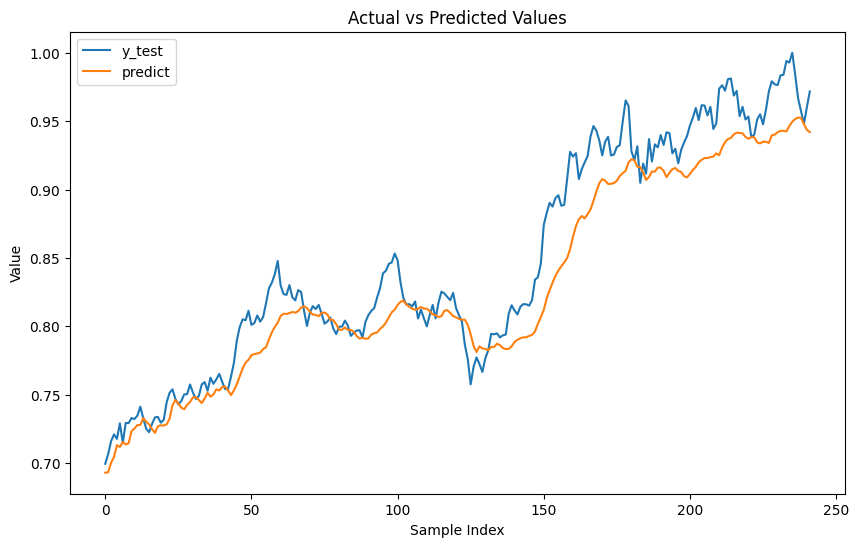

In [38]:
Y_pred=model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f"Root Mean Square Error (RMSE): {rmse}")

# Calculate MAPE for the test set
mape = mean_absolute_percentage_error(Y_test, Y_pred) 
print(f"Mean Absolute Percentage Error (MAPE): {mape:}")
plt.figure(figsize=(10, 6))
plt.plot(Y_test,label="y_test")
plt.plot(Y_pred,label="predict")
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')


# RNN

In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Preprocess data
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

# Create dataset
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Set parameters
file_path = 'sensex_data.csv'  # File path to the CSV file
look_back = 20
epochs = 100
batch_size = 32

# Read data from CSV file
stock_data = pd.read_csv(file_path)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data.set_index('Date')

# Preprocess data
scaled_data, scaler = preprocess_data(stock_data[['Close']].values)

# Create dataset
X, Y = create_dataset(scaled_data, look_back)

# Reshape data for SimpleRNN
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split data into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Define the SimpleRNN model
model = Sequential([
    SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    SimpleRNN(units=50),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test), verbose=2)

# Evaluate the model
train_loss = model.evaluate(X_train, Y_train, verbose=0)
test_loss = model.evaluate(X_test, Y_test, verbose=0)
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")


Epoch 1/100


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 - 8s - 272ms/step - loss: 0.0721 - val_loss: 8.1750e-04
Epoch 2/100
31/31 - 0s - 11ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 3/100
31/31 - 0s - 10ms/step - loss: 5.0414e-04 - val_loss: 0.0016
Epoch 4/100
31/31 - 0s - 11ms/step - loss: 4.1561e-04 - val_loss: 0.0016
Epoch 5/100
31/31 - 0s - 10ms/step - loss: 3.3266e-04 - val_loss: 0.0018
Epoch 6/100
31/31 - 0s - 10ms/step - loss: 3.1107e-04 - val_loss: 0.0014
Epoch 7/100
31/31 - 0s - 13ms/step - loss: 2.9336e-04 - val_loss: 7.3866e-04
Epoch 8/100
31/31 - 0s - 10ms/step - loss: 2.6369e-04 - val_loss: 0.0013
Epoch 9/100
31/31 - 0s - 11ms/step - loss: 2.7543e-04 - val_loss: 0.0011
Epoch 10/100
31/31 - 0s - 11ms/step - loss: 2.9851e-04 - val_loss: 8.0862e-04
Epoch 11/100
31/31 - 0s - 10ms/step - loss: 2.5278e-04 - val_loss: 5.2037e-04
Epoch 12/100
31/31 - 0s - 14ms/step - loss: 3.0725e-04 - val_loss: 7.2671e-04
Epoch 13/100
31/31 - 1s - 17ms/step - loss: 2.5566e-04 - val_loss: 7.5941e-04
Epoch 14/100
31/31 - 0s - 10ms/step - loss

In [7]:
import numpy as np

# Number of future predictions
num_predictions = 100

# Initialize the list for storing predictions
predictions = []

# Retrieve the last input sequence from the test data
current_sequence = X_test[-1]

# Predict future values using the GRU model
for i in range(num_predictions):
    # Reshape the current sequence to match the input shape expected by the GRU model
    current_sequence_reshaped = current_sequence.reshape(1, look_back, 1)
    
    # Predict the next value using the GRU model
    next_prediction = model.predict(current_sequence_reshaped)
    
    # Append the predicted value to the predictions list
    predictions.append(next_prediction[0, 0])  # Store only the first value from the prediction
    
    # Shift the current sequence left by one element and insert the new prediction at the end
    current_sequence = np.roll(current_sequence, -1, axis=0)
    current_sequence[-1] = next_prediction[0, 0]  # Update with only the first predicted value

# Convert predictions list to numpy array
predictions = np.array(predictions)

# Reshape predictions array to match the expected shape for inverse transformation
predictions_reshaped = predictions.reshape(-1, 1)

# Transform predictions back to the original scale using the scaler
inverse_transformed_predictions = scaler.inverse_transform(predictions_reshaped)

# Output the predictions
print("Future predictions for the next 100 days:")
print(inverse_transformed_predictions.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
Root Mean Square Error (RMSE): 0.015549632778265009
Mean Absolute Percentage Error (MAPE): 0.014747634483609183


Text(0, 0.5, 'Value')

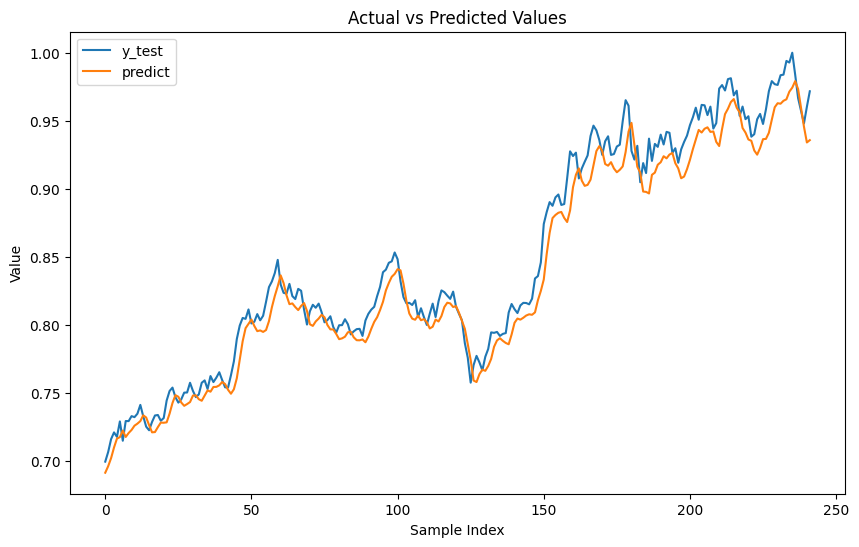

In [9]:
Y_pred=model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f"Root Mean Square Error (RMSE): {rmse}")

# Calculate MAPE for the test set
mape = mean_absolute_percentage_error(Y_test, Y_pred) 
print(f"Mean Absolute Percentage Error (MAPE): {mape:}")
plt.figure(figsize=(10, 6))
plt.plot(Y_test,label="y_test")
plt.plot(Y_pred,label="predict")
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')


# BI-LSTM

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, LSTM

# Preprocess data
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

# Create dataset
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Set parameters
file_path = 'sensex_data.csv' # File path to the CSV file
look_back = 20
epochs = 100
batch_size = 32

# Read data from CSV file
stock_data = pd.read_csv(file_path)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data.set_index('Date')

# Preprocess data
scaled_data, scaler = preprocess_data(stock_data[['Close']].values)

# Create dataset
X, Y = create_dataset(scaled_data, look_back)

# Reshape data for Bidirectional LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split data into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Define the Bidirectional LSTM model
model = Sequential([
    Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], 1)),
    Bidirectional(LSTM(units=50)),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test), verbose=2)

# Evaluate the model
train_loss = model.evaluate(X_train, Y_train, verbose=0)
test_loss = model.evaluate(X_test, Y_test, verbose=0)
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
31/31 - 27s - 862ms/step - loss: 0.0191 - val_loss: 0.0022
Epoch 2/100
31/31 - 2s - 51ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 3/100
31/31 - 2s - 50ms/step - loss: 0.0011 - val_loss: 8.6284e-04
Epoch 4/100
31/31 - 2s - 54ms/step - loss: 0.0010 - val_loss: 6.1193e-04
Epoch 5/100
31/31 - 2s - 52ms/step - loss: 0.0010 - val_loss: 8.0744e-04
Epoch 6/100
31/31 - 2s - 51ms/step - loss: 0.0010 - val_loss: 0.0018
Epoch 7/100
31/31 - 2s - 51ms/step - loss: 9.1835e-04 - val_loss: 5.6166e-04
Epoch 8/100
31/31 - 2s - 52ms/step - loss: 8.6865e-04 - val_loss: 0.0010
Epoch 9/100
31/31 - 2s - 50ms/step - loss: 8.8247e-04 - val_loss: 7.2380e-04
Epoch 10/100
31/31 - 2s - 51ms/step - loss: 7.7903e-04 - val_loss: 0.0013
Epoch 11/100
31/31 - 2s - 54ms/step - loss: 7.2506e-04 - val_loss: 8.9399e-04
Epoch 12/100
31/31 - 2s - 57ms/step - loss: 6.9711e-04 - val_loss: 4.4020e-04
Epoch 13/100
31/31 - 2s - 51ms/step - loss: 6.1723e-04 - val_loss: 0.0012
Epoch 14/100
31/31 - 2s - 51ms/step - los

In [20]:
import numpy as np

# Number of future predictions
num_predictions = 100

# Initialize the list for storing predictions
predictions = []

# Retrieve the last input sequence from the test data
current_sequence = X_test[-1]

# Predict future values using the GRU model
for i in range(num_predictions):
    # Reshape the current sequence to match the input shape expected by the GRU model
    current_sequence_reshaped = current_sequence.reshape(1, look_back, 1)
    
    # Predict the next value using the GRU model
    next_prediction = model.predict(current_sequence_reshaped)
    
    # Append the predicted value to the predictions list
    predictions.append(next_prediction[0, 0])  # Store only the first value from the prediction
    
    # Shift the current sequence left by one element and insert the new prediction at the end
    current_sequence = np.roll(current_sequence, -1, axis=0)
    current_sequence[-1] = next_prediction[0, 0]  # Update with only the first predicted value

# Convert predictions list to numpy array
predictions = np.array(predictions)

# Reshape predictions array to match the expected shape for inverse transformation
predictions_reshaped = predictions.reshape(-1, 1)

# Transform predictions back to the original scale using the scaler
inverse_transformed_predictions = scaler.inverse_transform(predictions_reshaped)

# Output the predictions
print("Future predictions for the next 100 days:")
print(inverse_transformed_predictions.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
Root Mean Square Error (RMSE): 0.013006303060053136
Mean Absolute Percentage Error (MAPE): 0.01296164936429065


Text(0, 0.5, 'Value')

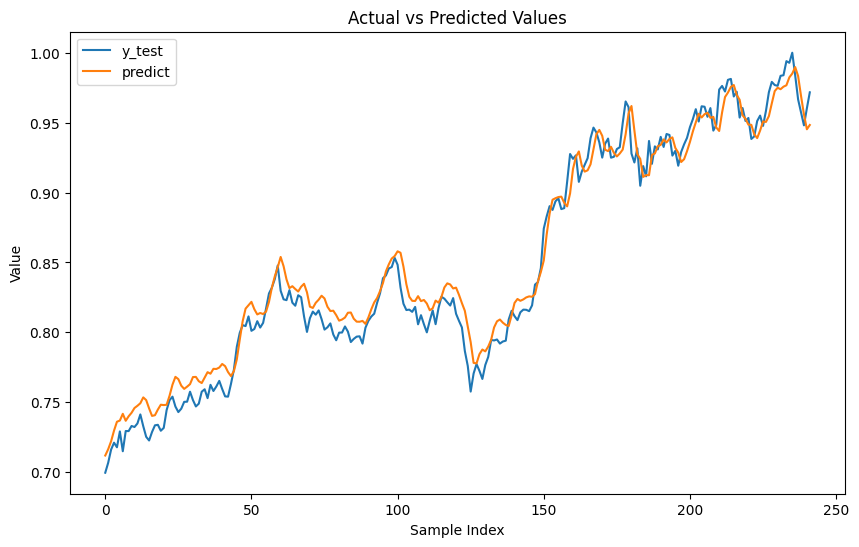

In [21]:
Y_pred=model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f"Root Mean Square Error (RMSE): {rmse}")

# Calculate MAPE for the test set
mape = mean_absolute_percentage_error(Y_test, Y_pred) 
print(f"Mean Absolute Percentage Error (MAPE): {mape:}")
plt.figure(figsize=(10, 6))
plt.plot(Y_test,label="y_test")
plt.plot(Y_pred,label="predict")
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')


# DNN

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Function for data preprocessing
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

# Function for creating dataset
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back)])
        Y.append(data[i + look_back])
    return np.array(X), np.array(Y)

# Parameters
file_path = 'sensex_data.csv'  # File path to the CSV file
look_back = 20
epochs = 100
batch_size = 32

# Read data from CSV file
stock_data = pd.read_csv(file_path)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)

# Preprocess data
scaled_data, scaler = preprocess_data(stock_data[['Close']].values)

# Create dataset
X, Y = create_dataset(scaled_data, look_back)

# Reshape data for DNN model
X = np.reshape(X, (X.shape[0], look_back))

# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Define the DNN model
model = Sequential([
    Dense(256, activation='relu', input_shape=(look_back,)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test), verbose=2)

# Evaluate the model
train_loss = model.evaluate(X_train, Y_train, verbose=0)
test_loss = model.evaluate(X_test, Y_test, verbose=0)
print(f"Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
31/31 - 4s - 141ms/step - loss: 0.0357 - val_loss: 0.0010
Epoch 2/100
31/31 - 0s - 9ms/step - loss: 0.0030 - val_loss: 0.0048
Epoch 3/100
31/31 - 0s - 9ms/step - loss: 0.0023 - val_loss: 0.0043
Epoch 4/100
31/31 - 0s - 9ms/step - loss: 0.0019 - val_loss: 0.0050
Epoch 5/100
31/31 - 0s - 8ms/step - loss: 0.0015 - val_loss: 0.0073
Epoch 6/100
31/31 - 0s - 12ms/step - loss: 0.0014 - val_loss: 0.0064
Epoch 7/100
31/31 - 0s - 8ms/step - loss: 0.0013 - val_loss: 0.0152
Epoch 8/100
31/31 - 0s - 9ms/step - loss: 0.0010 - val_loss: 0.0197
Epoch 9/100
31/31 - 0s - 8ms/step - loss: 9.6668e-04 - val_loss: 0.0142
Epoch 10/100
31/31 - 0s - 8ms/step - loss: 9.0641e-04 - val_loss: 0.0142
Epoch 11/100
31/31 - 0s - 9ms/step - loss: 8.9556e-04 - val_loss: 0.0142
Epoch 12/100
31/31 - 0s - 9ms/step - loss: 0.0010 - val_loss: 0.0218
Epoch 13/100
31/31 - 0s - 9ms/step - loss: 9.7511e-04 - val_loss: 0.0191
Epoch 14/100
31/31 - 0s - 11ms/step - loss: 7.4990e-04 - val_loss: 0.0200
Epoch 15/100
31/31 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Root Mean Square Error (RMSE): 0.1336
Mean Absolute Percentage Error (MAPE): 0.1555207901227815


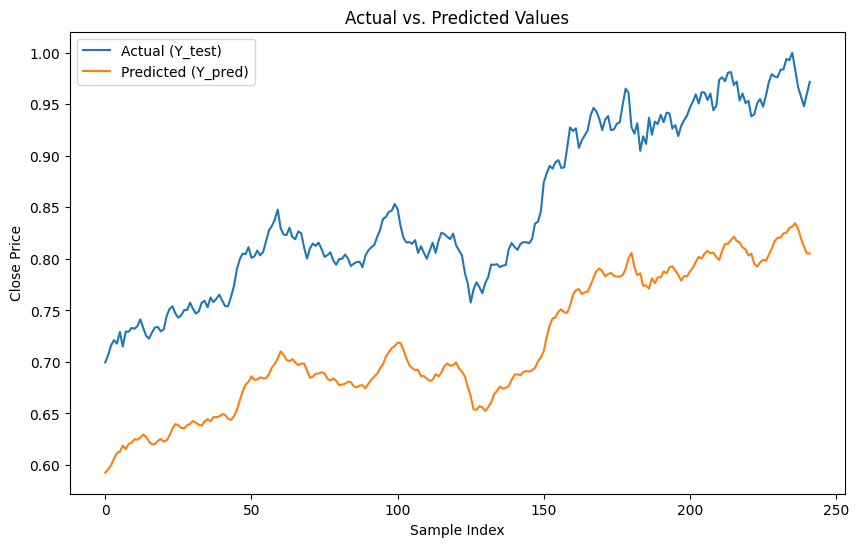

In [16]:

# Predict values on the test set
Y_pred = model.predict(X_test)

# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
mape = mean_absolute_percentage_error(Y_test, Y_pred)

# Print RMSE and MAPE
print(f"Root Mean Square Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(Y_test, label="Actual (Y_test)")
plt.plot(Y_pred, label="Predicted (Y_pred)")
plt.legend()
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Close Price')
plt.show()
